In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
house_df = pd.read_csv("train.csv")

In [3]:
house_df.shape

(1460, 81)

In [4]:
house_df.head()
#pd.set_option("max_columns",None)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
house_df.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [6]:
from sklearn.model_selection import ShuffleSplit

shuffleSplit = ShuffleSplit(n_splits=1, train_size=0.8, random_state=66)
for train_index, test_index in shuffleSplit.split(house_df):
    train_set = house_df.loc[train_index]
    test_set = house_df.loc[test_index]

In [7]:
#Columns Order Check
train_set.columns == test_set.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True])

In [8]:
#EDA
train_set.drop(['Id'],axis=1,inplace=True)

In [9]:
train_set.shape

(1168, 80)

In [10]:
#Checking datatype counts
train_set.dtypes.value_counts()

object     43
int64      34
float64     3
dtype: int64

In [11]:
#EDA
target = pd.DataFrame(train_set['SalePrice'])
target.dtypes

SalePrice    int64
dtype: object

In [12]:
#EDA
independent_df = train_set.drop('SalePrice',axis=1)

In [13]:
independent_df.dtypes.value_counts()

object     43
int64      33
float64     3
dtype: int64

In [14]:
independent_df.isnull().sum().sort_values(ascending=False,kind='mergesort')

PoolQC         1162
MiscFeature    1119
Alley          1096
Fence           941
FireplaceQu     540
               ... 
LotShape          0
Street            0
LotArea           0
MSZoning          0
MSSubClass        0
Length: 79, dtype: int64

In [15]:
#Finding columns which have more than 60% missing values
empty_df = independent_df.dropna(axis=1,thresh=(len(independent_df) * 0.6))
print(empty_df.shape)
print(independent_df.columns.difference(empty_df.columns))

#To save memory removing irrelavent variables
empty_df = None

(1168, 74)
Index(['Alley', 'Fence', 'FireplaceQu', 'MiscFeature', 'PoolQC'], dtype='object')


In [16]:
#EDA
#Removing columns which have more than 60% missing values
independent_df.drop(labels=['Alley', 'Fence', 'FireplaceQu', 'MiscFeature', 'PoolQC'],axis=1,inplace=True)
independent_df.shape

(1168, 74)

In [17]:
independent_df.isnull().sum().sort_values(ascending=False)

LotFrontage     209
GarageFinish     66
GarageType       66
GarageCond       66
GarageQual       66
               ... 
CentralAir        0
HeatingQC         0
Heating           0
SaleType          0
MSSubClass        0
Length: 74, dtype: int64

In [18]:
#EDA
#Removing 85% low variance constant columns
low_var_col = []
for colname,colvalues in independent_df.items():
    column_count = colvalues.value_counts()[abs(colvalues.value_counts(normalize=True)) > 0.85].count()
    if column_count == 1:
        low_var_col.append(colname)
        independent_df.drop(colname, axis=1,inplace=True)
        
print(low_var_col)

['Street', 'LandContour', 'Utilities', 'LandSlope', 'Condition1', 'Condition2', 'RoofMatl', 'ExterCond', 'BsmtCond', 'BsmtFinType2', 'BsmtFinSF2', 'Heating', 'CentralAir', 'Electrical', 'LowQualFinSF', 'BsmtHalfBath', 'KitchenAbvGr', 'Functional', 'GarageQual', 'GarageCond', 'PavedDrive', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'SaleType']


In [19]:
independent_df.shape

(1168, 47)

In [20]:
#EDA
numerical_df = pd.DataFrame(independent_df.select_dtypes(exclude='object'))
categorical_df = pd.DataFrame(independent_df.select_dtypes(include='object'))
print("Numerical Data Types " + str(numerical_df.dtypes.value_counts().sum()))
print("Categorical Datatypes " + str(categorical_df.dtypes.value_counts().sum()))

Numerical Data Types 27
Categorical Datatypes 20


In [21]:
numerical_df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,...,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,YrSold
1159,60,76.0,9120,6,6,1974,1974,270.0,442,459,...,4,8,1,1974.0,2,540,0,69,7,2008
1299,20,75.0,7500,5,7,1959,1994,0.0,340,0,...,3,6,0,1959.0,1,305,218,0,5,2010
1160,160,24.0,2280,6,5,1978,1978,0.0,311,544,...,3,7,1,1978.0,2,440,26,0,7,2010
981,60,98.0,12203,8,5,1998,1999,975.0,854,371,...,4,8,1,1998.0,3,676,250,0,7,2009
685,160,NaN,5062,7,5,1984,1984,0.0,828,180,...,3,6,1,1984.0,2,577,219,0,9,2007


In [22]:
numerical_df.isnull().sum().sort_values(ascending=False)

LotFrontage     209
GarageYrBlt      66
MasVnrArea        8
YrSold            0
2ndFlrSF          0
LotArea           0
OverallQual       0
OverallCond       0
YearBuilt         0
YearRemodAdd      0
BsmtFinSF1        0
BsmtUnfSF         0
TotalBsmtSF       0
1stFlrSF          0
GrLivArea         0
MoSold            0
BsmtFullBath      0
FullBath          0
HalfBath          0
BedroomAbvGr      0
TotRmsAbvGrd      0
Fireplaces        0
GarageCars        0
GarageArea        0
WoodDeckSF        0
OpenPorchSF       0
MSSubClass        0
dtype: int64

In [23]:
numerical_df['LotFrontage'].describe()

count    959.000000
mean      70.087591
std       24.745946
min       21.000000
25%       59.000000
50%       70.000000
75%       80.000000
max      313.000000
Name: LotFrontage, dtype: float64

In [24]:
numerical_df['MasVnrArea'].describe()

count    1160.000000
mean      105.174138
std       180.756155
min         0.000000
25%         0.000000
50%         0.000000
75%       168.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

In [25]:
#EDA
#Filling empty values with median
impute_value_LotFrontage=numerical_df['LotFrontage'].median()
impute_value_MasVnrArea=numerical_df['MasVnrArea'].median()
numerical_df['LotFrontage'].fillna(impute_value_LotFrontage,inplace=True)
numerical_df['MasVnrArea'].fillna(impute_value_MasVnrArea,inplace=True)

In [26]:
numerical_df.isnull().sum().sort_values(ascending=False)

GarageYrBlt     66
YrSold           0
2ndFlrSF         0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
GrLivArea        0
MoSold           0
BsmtFullBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
MSSubClass       0
dtype: int64

In [27]:
numerical_df.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'MoSold', 'YrSold'],
      dtype='object')

In [28]:
import datetime
now = datetime.datetime.now()

In [29]:
#EDA
#Converting year values to meaningful numbers
numerical_df['YearBuilt'].update(now.year - numerical_df['YearBuilt'])
numerical_df['YearRemodAdd'].update(now.year - numerical_df['YearRemodAdd'])
numerical_df['GarageYrBlt'].update(now.year - numerical_df['GarageYrBlt'])
numerical_df['YrSold'].update(now.year - numerical_df['YrSold'])

In [30]:
print(numerical_df['GarageYrBlt'].sort_values())

378     10.0
819     10.0
987     10.0
1165    11.0
507     11.0
        ... 
970      NaN
198      NaN
210      NaN
843      NaN
307      NaN
Name: GarageYrBlt, Length: 1168, dtype: float64


In [31]:
#EDA
#Filling empty values with median
impute_value_GarageYrBlt=numerical_df['GarageYrBlt'].median()
numerical_df['GarageYrBlt'].fillna(impute_value_GarageYrBlt,inplace=True)

In [32]:
numerical_df.isnull().sum().sort_values(ascending=False)

YrSold          0
2ndFlrSF        0
LotFrontage     0
LotArea         0
OverallQual     0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
MasVnrArea      0
BsmtFinSF1      0
BsmtUnfSF       0
TotalBsmtSF     0
1stFlrSF        0
GrLivArea       0
MoSold          0
BsmtFullBath    0
FullBath        0
HalfBath        0
BedroomAbvGr    0
TotRmsAbvGrd    0
Fireplaces      0
GarageYrBlt     0
GarageCars      0
GarageArea      0
WoodDeckSF      0
OpenPorchSF     0
MSSubClass      0
dtype: int64

In [33]:
#Collenearity check with target variable
coll_df = pd.concat([numerical_df,target],axis=1)

In [34]:
coll_df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,...,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SalePrice
1159,60,76.0,9120,6,6,46,46,270.0,442,459,...,8,1,46.0,2,540,0,69,7,12,185000
1299,20,75.0,7500,5,7,61,26,0.0,340,0,...,6,0,61.0,1,305,218,0,5,10,154000
1160,160,24.0,2280,6,5,42,42,0.0,311,544,...,7,1,42.0,2,440,26,0,7,10,146000
981,60,98.0,12203,8,5,22,21,975.0,854,371,...,8,1,22.0,3,676,250,0,7,11,336000
685,160,70.0,5062,7,5,36,36,0.0,828,180,...,6,1,36.0,2,577,219,0,9,13,207500


In [35]:
corr_matrix = coll_df.corr()

In [36]:
for i in range(corr_matrix.shape[0]):
    for j in range(i+1, corr_matrix.shape[0]):
        if abs(corr_matrix.iloc[i,j]) >= 0.7:
               print(corr_matrix.index[i]+','+corr_matrix.index[j]+ '-->' +str(corr_matrix.iloc[i,j]))

OverallQual,SalePrice-->0.7950514122712488
YearBuilt,GarageYrBlt-->0.7785411213847505
TotalBsmtSF,1stFlrSF-->0.8245240074064683
GrLivArea,TotRmsAbvGrd-->0.8261335504435144
GrLivArea,SalePrice-->0.7132217393287799
GarageCars,GarageArea-->0.8787882099628506


In [37]:
#EDA
#Picking columns based on Correlation and multicollinearity values above from numerical dataframe
numerical_df = numerical_df[['OverallQual','YearBuilt','TotalBsmtSF','GrLivArea','GarageArea']]
numerical_df.shape

(1168, 5)

In [38]:
numerical_df.head()

,OverallQual,YearBuilt,TotalBsmtSF,GrLivArea,GarageArea
1159,6,46,901,1876,540
1299,5,61,1246,1246,305
1160,6,42,855,1456,440
981,8,22,1225,2612,676
685,7,36,1190,2090,577


In [39]:
categorical_df.isnull().sum().sort_values(ascending=False)

GarageType       66
GarageFinish     66
BsmtExposure     32
BsmtFinType1     31
BsmtQual         31
MasVnrType        8
RoofStyle         0
LotShape          0
LotConfig         0
Neighborhood      0
BldgType          0
HouseStyle        0
SaleCondition     0
Exterior1st       0
Exterior2nd       0
ExterQual         0
Foundation        0
HeatingQC         0
KitchenQual       0
MSZoning          0
dtype: int64

In [40]:
print("GarageType --> "+str(categorical_df['GarageType'].unique()))
print("GarageFinish --> "+str(categorical_df['GarageFinish'].unique()))
print("BsmtExposure --> "+str(categorical_df['BsmtExposure'].unique()))
print("BsmtFinType1 --> "+str(categorical_df['BsmtFinType1'].unique()))
print("BsmtQual --> "+str(categorical_df['BsmtQual'].unique()))
print("MasVnrType --> "+str(categorical_df['MasVnrType'].unique()))

GarageType --> ['Attchd' 'BuiltIn' 'Detchd' nan 'CarPort' 'Basment' '2Types']
GarageFinish --> ['RFn' 'Unf' 'Fin' nan]
BsmtExposure --> ['No' 'Mn' 'Av' 'Gd' nan]
BsmtFinType1 --> ['ALQ' 'LwQ' 'GLQ' 'Unf' 'Rec' 'BLQ' nan]
BsmtQual --> ['TA' 'Gd' 'Ex' nan 'Fa']
MasVnrType --> ['BrkFace' 'None' 'BrkCmn' nan 'Stone']


In [41]:
#EDA
#NG for No Garage
#NB for No basement for all missing values
#Nothing
#Filling empty values with median
impute_value_Garage="NG"
impute_value_Basement="NB"
impute_value_MasVnrType="None"
categorical_df['GarageType'].fillna(impute_value_Garage,inplace=True)
categorical_df['GarageFinish'].fillna(impute_value_Garage,inplace=True)
categorical_df['BsmtExposure'].fillna(impute_value_Basement,inplace=True)
categorical_df['BsmtFinType1'].fillna(impute_value_Basement,inplace=True)
categorical_df['BsmtQual'].fillna(impute_value_Basement,inplace=True)
categorical_df['MasVnrType'].fillna(impute_value_MasVnrType,inplace=True)

In [42]:
categorical_df.isnull().sum().sort_values(ascending=False)

SaleCondition    0
GarageFinish     0
LotShape         0
LotConfig        0
Neighborhood     0
BldgType         0
HouseStyle       0
RoofStyle        0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
Foundation       0
BsmtQual         0
BsmtExposure     0
BsmtFinType1     0
HeatingQC        0
KitchenQual      0
GarageType       0
MSZoning         0
dtype: int64

In [43]:
categorical_df.shape

(1168, 20)

In [44]:
#Performing Annova test to find out and pick columns that have variance against target variable
import statsmodels.stats.multicomp as multi

In [45]:
mc = multi.MultiComparison(target['SalePrice'], categorical_df['SaleCondition'])
result = mc.tukeyhsd()
result.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
Abnorml,AdjLand,-52243.75,0.8255,-178296.3229,73808.8229,False
Abnorml,Alloca,20926.6944,0.9,-54317.4893,96170.8782,False
Abnorml,Family,887.2024,0.9,-61042.8911,62817.2959,False
Abnorml,Normal,27497.9261,0.0168,3085.9002,51909.9519,True
Abnorml,Partial,122843.5967,0.001,91092.2882,154594.9051,True
AdjLand,Alloca,73170.4444,0.6656,-69850.9801,216191.869,False
AdjLand,Family,53130.9524,0.867,-83356.3261,189618.2309,False
AdjLand,Normal,79741.6761,0.4455,-44312.2949,203795.647,False
AdjLand,Partial,175087.3467,0.001,49382.986,300791.7074,True
Alloca,Family,-20039.4921,0.9,-111697.6245,71618.6404,False


In [46]:
len(result.reject[result.reject==True])/len(result.reject)

0.4

In [47]:
select_annova_columns_for_onehot = set()
select_annova_columns_for_label = set()
select_annova_columns_for_dropping = set()

for column in categorical_df:
    mc = multi.MultiComparison(target['SalePrice'], categorical_df[column])
    result = mc.tukeyhsd()
    
    reject_col = abs(len(result.reject[result.reject==True])/len(result.reject))
    
    if(reject_col == 1 or reject_col == 0.5):
        select_annova_columns_for_label.add(column)
    elif(reject_col > 0.5):
        select_annova_columns_for_onehot.add(column)
    else:
        select_annova_columns_for_dropping.add(column)
        
print("One hot encoding columns --> "+str(select_annova_columns_for_onehot))
print("Label encoding columns --> "+str(select_annova_columns_for_label))
print("Columns to be dropped --> "+str(select_annova_columns_for_dropping))

One hot encoding columns --> {'BsmtQual', 'MSZoning', 'BldgType', 'Neighborhood', 'MasVnrType', 'BsmtExposure'}
Label encoding columns --> {'GarageFinish', 'KitchenQual', 'HeatingQC', 'ExterQual', 'LotShape'}
Columns to be dropped --> {'Exterior1st', 'SaleCondition', 'BsmtFinType1', 'LotConfig', 'Exterior2nd', 'RoofStyle', 'GarageType', 'HouseStyle', 'Foundation'}


In [48]:
#EDA
#Dropping low relation columns
categorical_df.drop(labels=['BsmtFinType1', 'Exterior2nd', 'Exterior1st', 'HouseStyle', 'SaleCondition', 'LotConfig', 
                            'RoofStyle', 'Foundation', 'GarageType'],axis=1,inplace=True)

In [49]:
categorical_df.shape

(1168, 11)

In [50]:
for column in categorical_df:
    col_details = categorical_df[column].unique()
    print(column +" --> " + str(len(col_details)) + "with unique values --> "+str(col_details))

MSZoning --> 5with unique values --> ['RL' 'FV' 'RM' 'RH' 'C (all)']
LotShape --> 4with unique values --> ['Reg' 'IR1' 'IR2' 'IR3']
Neighborhood --> 25with unique values --> ['NWAmes' 'NAmes' 'NPkVill' 'NoRidge' 'StoneBr' 'Somerst' 'Mitchel'
 'ClearCr' 'SawyerW' 'Gilbert' 'CollgCr' 'Edwards' 'BrkSide' 'OldTown'
 'Sawyer' 'MeadowV' 'NridgHt' 'Timber' 'Blmngtn' 'SWISU' 'BrDale'
 'Crawfor' 'IDOTRR' 'Blueste' 'Veenker']
BldgType --> 5with unique values --> ['1Fam' 'Twnhs' 'TwnhsE' '2fmCon' 'Duplex']
MasVnrType --> 4with unique values --> ['BrkFace' 'None' 'BrkCmn' 'Stone']
ExterQual --> 4with unique values --> ['Gd' 'TA' 'Fa' 'Ex']
BsmtQual --> 5with unique values --> ['TA' 'Gd' 'Ex' 'NB' 'Fa']
BsmtExposure --> 5with unique values --> ['No' 'Mn' 'Av' 'Gd' 'NB']
HeatingQC --> 4with unique values --> ['TA' 'Ex' 'Fa' 'Gd']
KitchenQual --> 4with unique values --> ['Gd' 'TA' 'Fa' 'Ex']
GarageFinish --> 4with unique values --> ['RFn' 'Unf' 'Fin' 'NG']


In [51]:
#EDA
#Label Encoding
#Label encoding columns --> {'ExterQual', 'KitchenQual', 'HeatingQC', 'LotShape', 'GarageFinish'}
#Adding additional column 'BsmtQual' as well due to order present
cat_list_dict1 = {'ExterQual': ['Gd', 'TA', 'Ex', 'Fa'],
                  'KitchenQual': ['Gd', 'TA', 'Ex', 'Fa'],
                  'HeatingQC': ['TA', 'Ex', 'Fa', 'Gd'],
                  'LotShape': ['Reg', 'IR1', 'IR2', 'IR3'],
                  'GarageFinish': ['RFn','Unf', 'Fin', 'NG'],
                  'BsmtQual': ['Gd', 'TA', 'Ex', 'NB', 'Fa']}

In [52]:
def convertCategorisToCodes(columns, df):
    for column in columns:
        df[column] = pd.Categorical(df[column], categories = cat_list_dict1[column])
        df[column] = df[column].cat.codes

In [53]:
#EDA
#Label encoding columns --> {'GarageFinish', 'LotShape', 'KitchenQual', 'ExterQual'}
convertCategorisToCodes(['ExterQual'],categorical_df)
convertCategorisToCodes(['KitchenQual'],categorical_df)
convertCategorisToCodes(['HeatingQC'],categorical_df)
convertCategorisToCodes(['LotShape'],categorical_df)
convertCategorisToCodes(['GarageFinish'],categorical_df)
convertCategorisToCodes(['BsmtQual'],categorical_df)

In [54]:
categorical_df.head()

,MSZoning,LotShape,Neighborhood,BldgType,MasVnrType,ExterQual,BsmtQual,BsmtExposure,HeatingQC,KitchenQual,GarageFinish
1159,RL,0,NWAmes,1Fam,BrkFace,0,1,No,0,0,0
1299,RL,0,NAmes,1Fam,None,1,1,No,1,0,0
1160,RL,0,NPkVill,Twnhs,None,1,0,No,2,1,1
981,RL,1,NoRidge,1Fam,BrkFace,0,0,No,1,0,2
685,RL,1,StoneBr,TwnhsE,None,0,0,Mn,3,0,2


In [55]:
#EDA
#One hot encoding
#One hot encoding columns --> One hot encoding columns --> {'BldgType', 'MasVnrType', 'BsmtExposure', 'Neighborhood', 'MSZoning'}

cat_list_dict2 = {'BldgType': ['1Fam','2fmCon','Duplex','TwnhsE','Twnhs'], 
                  'MasVnrType': ['BrkFace','None','Stone','BrkCmn'], 
                  'BsmtExposure': ['No','Gd','Mn','Av','NB'],  
                  'Neighborhood': ['CollgCr','Veenker','Crawfor','NoRidge','Mitchel','Somerst','NWAmes'
                                     'OldTown','BrkSide','Sawyer','NridgHt','NAmes','SawyerW','IDOTRR'
                                     'MeadowV','Edwards','Timber','Gilbert','StoneBr','ClearCr','NPkVill'
                                     'Blmngtn','BrDale','SWISU','Blueste'],
                  'MSZoning': ['RL','RM','C (all)','FV','RH']}

In [56]:
#One hot Encoding EDA

for key_name in cat_list_dict2.keys():
    categorical_df[key_name] = pd.Categorical(categorical_df[key_name], categories = cat_list_dict2[key_name])
    categorical_df = pd.get_dummies(categorical_df, columns=[key_name], prefix=[key_name], drop_first=True)

In [57]:
categorical_df.head()

,LotShape,ExterQual,BsmtQual,HeatingQC,KitchenQual,GarageFinish,BldgType_2fmCon,BldgType_Duplex,BldgType_TwnhsE,BldgType_Twnhs,...,Neighborhood_StoneBr,Neighborhood_ClearCr,Neighborhood_NPkVillBlmngtn,Neighborhood_BrDale,Neighborhood_SWISU,Neighborhood_Blueste,MSZoning_RM,MSZoning_C (all),MSZoning_FV,MSZoning_RH
1159,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1299,0,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1160,0,1,0,2,1,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
981,1,0,0,1,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
685,1,0,0,3,0,2,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0


In [58]:
#Model fit with Train data check
from sklearn.linear_model import LinearRegression

In [59]:
train_X = pd.concat([numerical_df,categorical_df], axis=1)
train_y = target

In [60]:
lr_model = LinearRegression()
lr_model.fit(train_X, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [61]:
train_prediction = lr_model.predict(train_X)

In [62]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [63]:
train_r2_score = r2_score(train_y, train_prediction)
train_mse = mean_squared_error(train_y, train_prediction)

print("Train R2 Score : ", train_r2_score)
print("Train Root Mean Squared Error : ", np.sqrt(train_mse))

Train R2 Score :  0.8399745491322481
Train Root Mean Squared Error :  32117.228666628795


# Testing using Test Dataset

In [64]:
test_set.shape

(292, 81)

## Performing EDA as in train for all features in test dataset

In [65]:
test_set.drop(['Id'],axis=1,inplace=True)
test_set.drop(labels=['Alley', 'Fence', 'FireplaceQu', 'MiscFeature', 'PoolQC'],axis=1,inplace=True)
test_set.drop(labels=['Street', 'LandContour', 'Utilities', 'LandSlope', 'Condition1', 'Condition2', 'RoofMatl', 
                     'ExterCond', 'BsmtCond', 'BsmtFinType2', 'BsmtFinSF2', 'Heating', 'CentralAir', 'Electrical', 
                     'LowQualFinSF', 'BsmtHalfBath', 'KitchenAbvGr', 'Functional', 'GarageQual', 'GarageCond', 
                     'PavedDrive', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 
                     'SaleType'], axis=1,inplace=True)

In [66]:
target = pd.DataFrame(test_set['SalePrice'])

In [67]:
independent_df = test_set.drop('SalePrice',axis=1)

In [68]:
#EDA
numerical_df = pd.DataFrame(independent_df.select_dtypes(exclude='object'))
categorical_df = pd.DataFrame(independent_df.select_dtypes(include='object'))

In [69]:
numerical_df['LotFrontage'].fillna(impute_value_LotFrontage,inplace=True)
numerical_df['MasVnrArea'].fillna(impute_value_MasVnrArea,inplace=True)
numerical_df['YearBuilt'].update(now.year - numerical_df['YearBuilt'])
numerical_df['YearRemodAdd'].update(now.year - numerical_df['YearRemodAdd'])
numerical_df['GarageYrBlt'].update(now.year - numerical_df['GarageYrBlt'])
numerical_df['YrSold'].update(now.year - numerical_df['YrSold'])
numerical_df['GarageYrBlt'].fillna(impute_value_GarageYrBlt,inplace=True)

In [70]:
numerical_df = numerical_df[['OverallQual','YearBuilt','TotalBsmtSF','GrLivArea','GarageArea']]

In [71]:
categorical_df['GarageType'].fillna(impute_value_Garage,inplace=True)
categorical_df['GarageFinish'].fillna(impute_value_Garage,inplace=True)
categorical_df['BsmtExposure'].fillna(impute_value_Basement,inplace=True)
categorical_df['BsmtFinType1'].fillna(impute_value_Basement,inplace=True)
categorical_df['BsmtQual'].fillna(impute_value_Basement,inplace=True)
categorical_df['MasVnrType'].fillna(impute_value_MasVnrType,inplace=True)

In [72]:
categorical_df.drop(labels=['BsmtFinType1', 'Exterior2nd', 'Exterior1st', 'HouseStyle', 'SaleCondition', 'LotConfig', 
                            'RoofStyle', 'Foundation', 'GarageType'],axis=1,inplace=True)

In [73]:
convertCategorisToCodes(['ExterQual'],categorical_df)
convertCategorisToCodes(['KitchenQual'],categorical_df)
convertCategorisToCodes(['HeatingQC'],categorical_df)
convertCategorisToCodes(['LotShape'],categorical_df)
convertCategorisToCodes(['GarageFinish'],categorical_df)
convertCategorisToCodes(['BsmtQual'],categorical_df)

In [74]:
for key_name in cat_list_dict2.keys():
    categorical_df[key_name] = pd.Categorical(categorical_df[key_name], categories = cat_list_dict2[key_name])
    categorical_df = pd.get_dummies(categorical_df, columns=[key_name], prefix=[key_name], drop_first=True)

In [75]:
test_X = pd.concat([numerical_df,categorical_df], axis=1)
test_y = target

In [76]:
#Column Label Order Check
train_X.columns == test_X.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [77]:
test_prediction = lr_model.predict(test_X)

In [78]:
test_r2_score = r2_score(test_y, test_prediction)
test_mse = mean_squared_error(test_y, test_prediction)

print("TEST R2 Score : ", test_r2_score)
print("TEST Root Mean Squared Error : ", np.sqrt(test_mse))

TEST R2 Score :  0.8379081810767115
TEST Root Mean Squared Error :  30444.41557148201


In [79]:
def plot_learning_curves():
    train_errors, test_errors = [], []
    for m in range(1, len(train_X)):
        lr_model.fit(train_X[:m], train_y[:m])
        train_prediction = lr_model.predict(train_X[:m])
        test_prediction = lr_model.predict(test_X)
        train_errors.append(np.sqrt(mean_squared_error(train_prediction, train_y[:m])))
        test_errors.append(np.sqrt(mean_squared_error(test_prediction, test_y)))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(test_errors), "b-", linewidth=3, label="test")
    plt.legend(loc="upper right", fontsize=14)   
    plt.xlabel("Training set size", fontsize=14) 
    plt.ylabel("RMSE", fontsize=14)

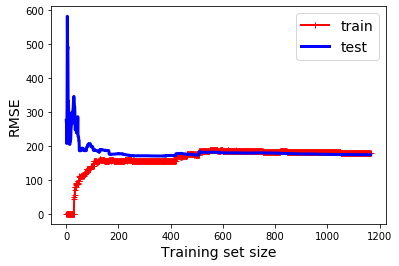

In [80]:
plot_learning_curves()

In [81]:
#Verification on column order check
X1 = pd.DataFrame({'a':[1,2,3],
                   'b':[4,5,6]})

In [82]:
X2 = pd.DataFrame({'A':[7,8,9],
                   'B':[10,11,12]})

In [83]:
X1.columns == X2.columns

array([False, False])

In [84]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [85]:
#Grid Search CV for Model Selection
poly_lr_reg_pipeline = Pipeline([
        ("poly_features", PolynomialFeatures()),
        ("lr", LinearRegression())
    ])

param_grid = {
        "poly_features__degree": [1,2,3,4]
    }

grid_search = GridSearchCV(poly_lr_reg_pipeline, param_grid, cv=3, scoring='r2')
grid_search.fit(train_X, train_y)

#print("Best params : ", grid_search.best_params_)
print("Best estimator : ", grid_search.best_estimator_)

Best estimator :  Pipeline(memory=None,
         steps=[('poly_features',
                 PolynomialFeatures(degree=1, include_bias=True,
                                    interaction_only=False, order='C')),
                ('lr',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)


In [86]:
train_prediction = grid_search.best_estimator_.predict(train_X)
train_mse = mean_squared_error(train_y, train_prediction)
r2_train = r2_score(train_y, train_prediction)

print("Train R-Square score: ", r2_train)
print("Train Root Mean Squared Error : ", np.sqrt(train_mse))

Train R-Square score:  0.8399745491322481
Train Root Mean Squared Error :  32117.228666628795


In [87]:
test_prediction = grid_search.best_estimator_.predict(test_X)
test_mse = mean_squared_error(test_y, test_prediction)
r2_test = r2_score(test_y, test_prediction)

print("Test R-Square score: ", r2_test)
print("Test Root Mean Squared Error : ", np.sqrt(test_mse))

Test R-Square score:  0.8379081810767162
Test Root Mean Squared Error :  30444.41557148157


## SGD Regressor

In [88]:
#SGD Regressor
from sklearn.linear_model import SGDRegressor

In [89]:
#In order to apply SGD scales should be within a certain range, hence scaling of fearures needs to be done
from sklearn.preprocessing import StandardScaler, MinMaxScaler

#Take means of of all the columns, subtract with the column values and divide by Standard Deviation
sc = StandardScaler()
std_train_X = sc.fit_transform(train_X)#Scalar subtraction and division which is vectorized implementation

In [90]:
sgd = SGDRegressor(random_state=66)
sgd.fit(std_train_X, train_y)


train_prediction = sgd.predict(std_train_X)
train_mse = mean_squared_error(train_y, train_prediction)
r2_train = r2_score(train_y, train_prediction)

print("Train R-Square score: ", r2_train)
print("Train Root Mean Squared Error : ", np.sqrt(train_mse))

Train R-Square score:  0.8387107763281049
Train Root Mean Squared Error :  32243.799343066497


D:\Users\vfdpqa8\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## SGDRegressor - Hyperparameter tuning

In [104]:
sgd = SGDRegressor(random_state=66, eta0=0.01, max_iter=100)
sgd.fit(std_train_X, train_y)

train_prediction = sgd.predict(std_train_X)
train_mse = mean_squared_error(train_y, train_prediction)
r2_train = r2_score(train_y, train_prediction)

print("Train R-Square score: ", r2_train)
print("Train Root Mean Squared Error : ", np.sqrt(train_mse))

Train R-Square score:  0.8387107763281049
Train Root Mean Squared Error :  32243.799343066497


D:\Users\vfdpqa8\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [106]:
std_test_X = sc.transform(test_X)

test_prediction = sgd.predict(std_test_X)
test_mse = mean_squared_error(test_y, test_prediction)
r2_test = r2_score(test_y, test_prediction)

print("Test R-Square score: ", r2_test)
print("Test Root Mean Squared Error : ", np.sqrt(test_mse))

Test R-Square score:  0.8421887616429123
Test Root Mean Squared Error :  30039.732258689022


## Model Selection using Grid Search CV
#### Its humanely impossible to fix the eta and iterations where we can get the right accuracy for model to reach global minima, Hence we need to use model slection technique like Grid search CV

In [111]:
#TO find best SGD model with appropriate hyperparameters
import warnings
warnings.filterwarnings("ignore")

poly_lr_reg_pipeline = Pipeline([
        ("poly_features", PolynomialFeatures()),
        ("std_scaling", StandardScaler()),
        ("sgd_reg", SGDRegressor(random_state=66))
    ])

param_grid = {
        "poly_features__degree": [1],
        "sgd_reg__eta0": np.linspace(0.01, 0.001, 20),
        "sgd_reg__max_iter": [300, 400]
    }

grid_search = GridSearchCV(poly_lr_reg_pipeline, param_grid, cv=20, scoring='r2')
grid_search.fit(train_X, train_y)

print("Best params : ", grid_search.best_params_)
print("Best estimator : ", grid_search.best_estimator_)

Best params :  {'poly_features__degree': 1, 'sgd_reg__eta0': 0.002421052631578947, 'sgd_reg__max_iter': 300}
Best estimator :  Pipeline(memory=None,
         steps=[('poly_features',
                 PolynomialFeatures(degree=1, include_bias=True,
                                    interaction_only=False, order='C')),
                ('std_scaling',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('sgd_reg',
                 SGDRegressor(alpha=0.0001, average=False, early_stopping=False,
                              epsilon=0.1, eta0=0.002421052631578947,
                              fit_intercept=True, l1_ratio=0.15,
                              learning_rate='invscaling', loss='squared_loss',
                              max_iter=300, n_iter_no_change=5, penalty='l2',
                              power_t=0.25, random_state=66, shuffle=True,
                              tol=0.001, validation_fraction=0.1, verbose=0,
                  

## Apply best fit model to train and test

In [112]:
train_prediction = grid_search.best_estimator_.predict(train_X)
train_mse = mean_squared_error(train_y, train_prediction)
r2_train = r2_score(train_y, train_prediction)

print("Train R-Square score: ", r2_train)
print("Train Root Mean Squared Error : ", np.sqrt(train_mse))

Train R-Square score:  0.839746403728173
Train Root Mean Squared Error :  32140.1149897022


In [113]:
test_prediction = grid_search.best_estimator_.predict(test_X)
test_mse = mean_squared_error(test_y, test_prediction)
r2_test = r2_score(test_y, test_prediction)

print("Test R-Square score: ", r2_test)
print("Test Root Mean Squared Error : ", np.sqrt(test_mse))

Test R-Square score:  0.8383948516490678
Test Root Mean Squared Error :  30398.677485171862
